
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Regression <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [2]:
# please fill in your student number and name
student_number = '400100616'
Name = 'Setayesh'
Last_Name = 'Esteki'

In this notebook, we will implement regression methods. We will start from simple Linear Regression and make our way towards more complicated regressors as well.

##Libraries

You are not allowed to use sklearn ready regression methods.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Linear and Polynomieal Regression (60 points)


### Linear Regression (10 points)


Linear regression assumes a linear relationship between the input features and the output. The model predicts $ y $ using the equation:

$$
y = \mathbf{Xw} + b
$$

Here:
- $ \mathbf{X} $: The matrix of input features.
- $ \mathbf{w} $: The weight vector (parameters).
- $ b $: The bias term.
- $ y $: The predicted output.

The objective is to find $ \mathbf{w} $ and $ b $ that minimize the error between predicted and actual values. The error is typically measured using the **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


The optimal solution for $ \mathbf{w} $ and $ b $ can be computed directly using the closed-form equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where:
- $ \mathbf{X}^T $: Transpose of the feature matrix.
- $ (\mathbf{X}^T \mathbf{X})^{-1} $: Inverse of the Gram matrix.

For simplicity, $ b $ (bias) can be incorporated into $ \mathbf{X} $ by adding a column of ones.

We implement linear regression from scratch using a custom class `LinearRegressor`:

1. **Initialization:** The class stores model weights.
2. **Fitting the Model:** The `fit` method computes weights using the closed-form solution.
3. **Prediction:** The `predict` method uses the weights to make predictions for new data.


In [4]:
class LinearRegressor:
    def __init__(self):
        """
        Initialize the PolynomialRegressor.
        The model will learn the parameters (weights and bias) using linear regression.
        """
        self.weights = None

    def fit(self, X, y):
        """
        Fits the linear regression model using an alternative method to compute the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).
        """
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        XT_X = X_bias.T @ X_bias
        XT_y = X_bias.T @ y
        self.weights = np.linalg.solve(XT_X, XT_y)

    def predict(self, X):
        """
        Predicts target values using the fitted model.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_bias @ self.weights


In this section, generate a synthetic linear dataset and utilize the implemented LinearRegressor to fit and evaluate it. Your calculated weights and real weights must be similar:

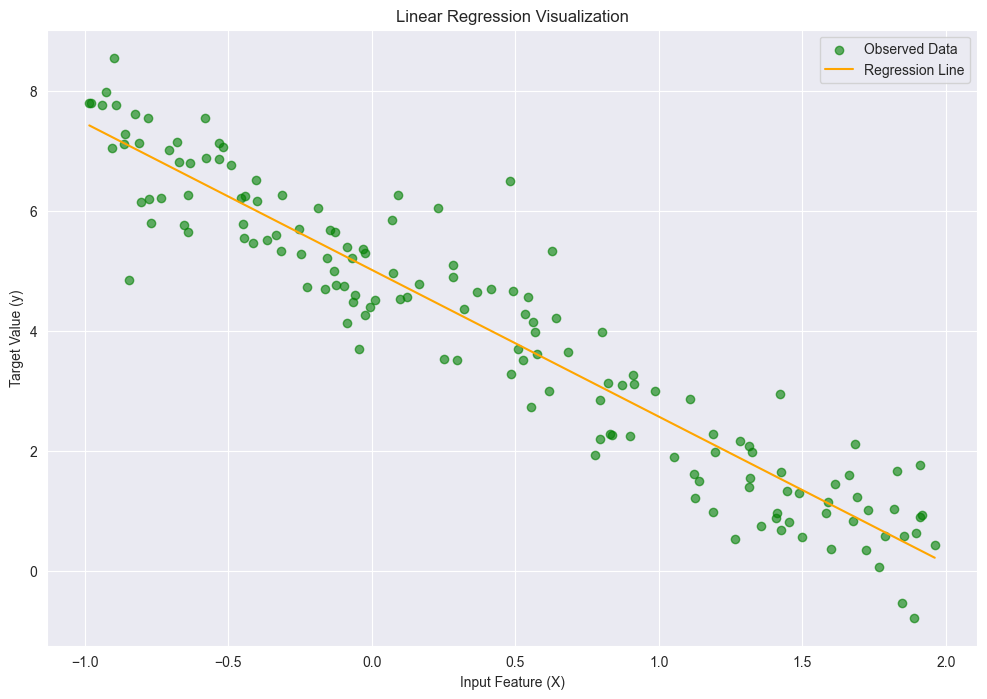

Actual weights: [5.0, -2.5]
Estimated weights (intercept and slope): [5.014345643047663, -2.4465748196982853]


In [5]:
#TODO: Generate a synthetic dataset
np.random.seed(42)
X = 3 * np.random.rand(150, 1) - 1
#TODO: Initialize and train the model
true_weights = [5.0, -2.5]
y = true_weights[0] + true_weights[1] * X.flatten() + np.random.normal(loc=0.0, scale=0.7, size=150)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegressor()
model.fit(X_train, y_train)

#TODO: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
#TODO: Visualize the results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color="green", alpha=0.6, label="Observed Data")
sorted_indices = np.argsort(X.flatten())
plt.plot(X.flatten()[sorted_indices], model.predict(X).flatten()[sorted_indices], color="orange", label="Regression Line")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target Value (y)")
plt.title("Linear Regression Visualization")
plt.legend()
plt.grid(True)
plt.show()

#TODO: Display weights
print("Actual weights:", true_weights)
print("Estimated weights (intercept and slope):", model.weights.tolist())


### Polynomial Regression (25 points)


Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent and independent variables as an nth-degree polynomial.

Given the features \(X\), polynomial regression tries to fit a model of the form:

$$
y = w_0 + w_1 X + w_2 X^2 + w_3 X^3 + \dots + w_n X^n
$$

Where:
- $X$ is the input feature.
- $w_0, w_1, \dots, w_n$ are the weights (coefficients) to be learned.
- $n$ is the degree of the polynomial.

To fit this model, we can use the same closed-form solution as in linear regression, but now the features include powers of $X$.


In [6]:
class PolynomialRegressor:
    def __init__(self, degree=2):
        """
        Initialize the PolynomialRegressor.

        Args:
        - degree (int): The degree of the polynomial to fit.
        """
        self.degree = degree
        self.weights = None

    def _polynomial_features(self, X):
        """
        Generate polynomial features up to the specified degree.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).

        Returns:
        - ndarray: Polynomial features of shape (n_samples, degree + 1).
        """
        return np.column_stack([X**i for i in range(self.degree + 1)])

    def fit(self, X, y):
        """
        Fits the polynomial regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).
        - y (ndarray): Target values of shape (n_samples,).
        """
        X_poly = self._polynomial_features(X)
        XT_X = X_poly.T @ X_poly
        XT_y = X_poly.T @ y
        self.weights = np.linalg.solve(XT_X, XT_y)

    def predict(self, X):
        """
        Predicts target values using the fitted polynomial regression model.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        X_poly = self._polynomial_features(X)
        return X_poly @ self.weights


Let's create a sample dataset of size 100 from following formula:

$$
y = x^4 - 4x^3 + 16 x + 4ϵ \ \ \ , \ \ \ x \in [-2, 2]
$$

where $\epsilon$ represents noise drawn from a $\mathcal{N}(0, 1)$ distribution.

The dataset will be split into 80% training data and 20% test data. Next, visualize the fitted polynomial curves for degrees ranging from 3 to 11. Additionally, compute and display the RMSE for both the training and test sets:

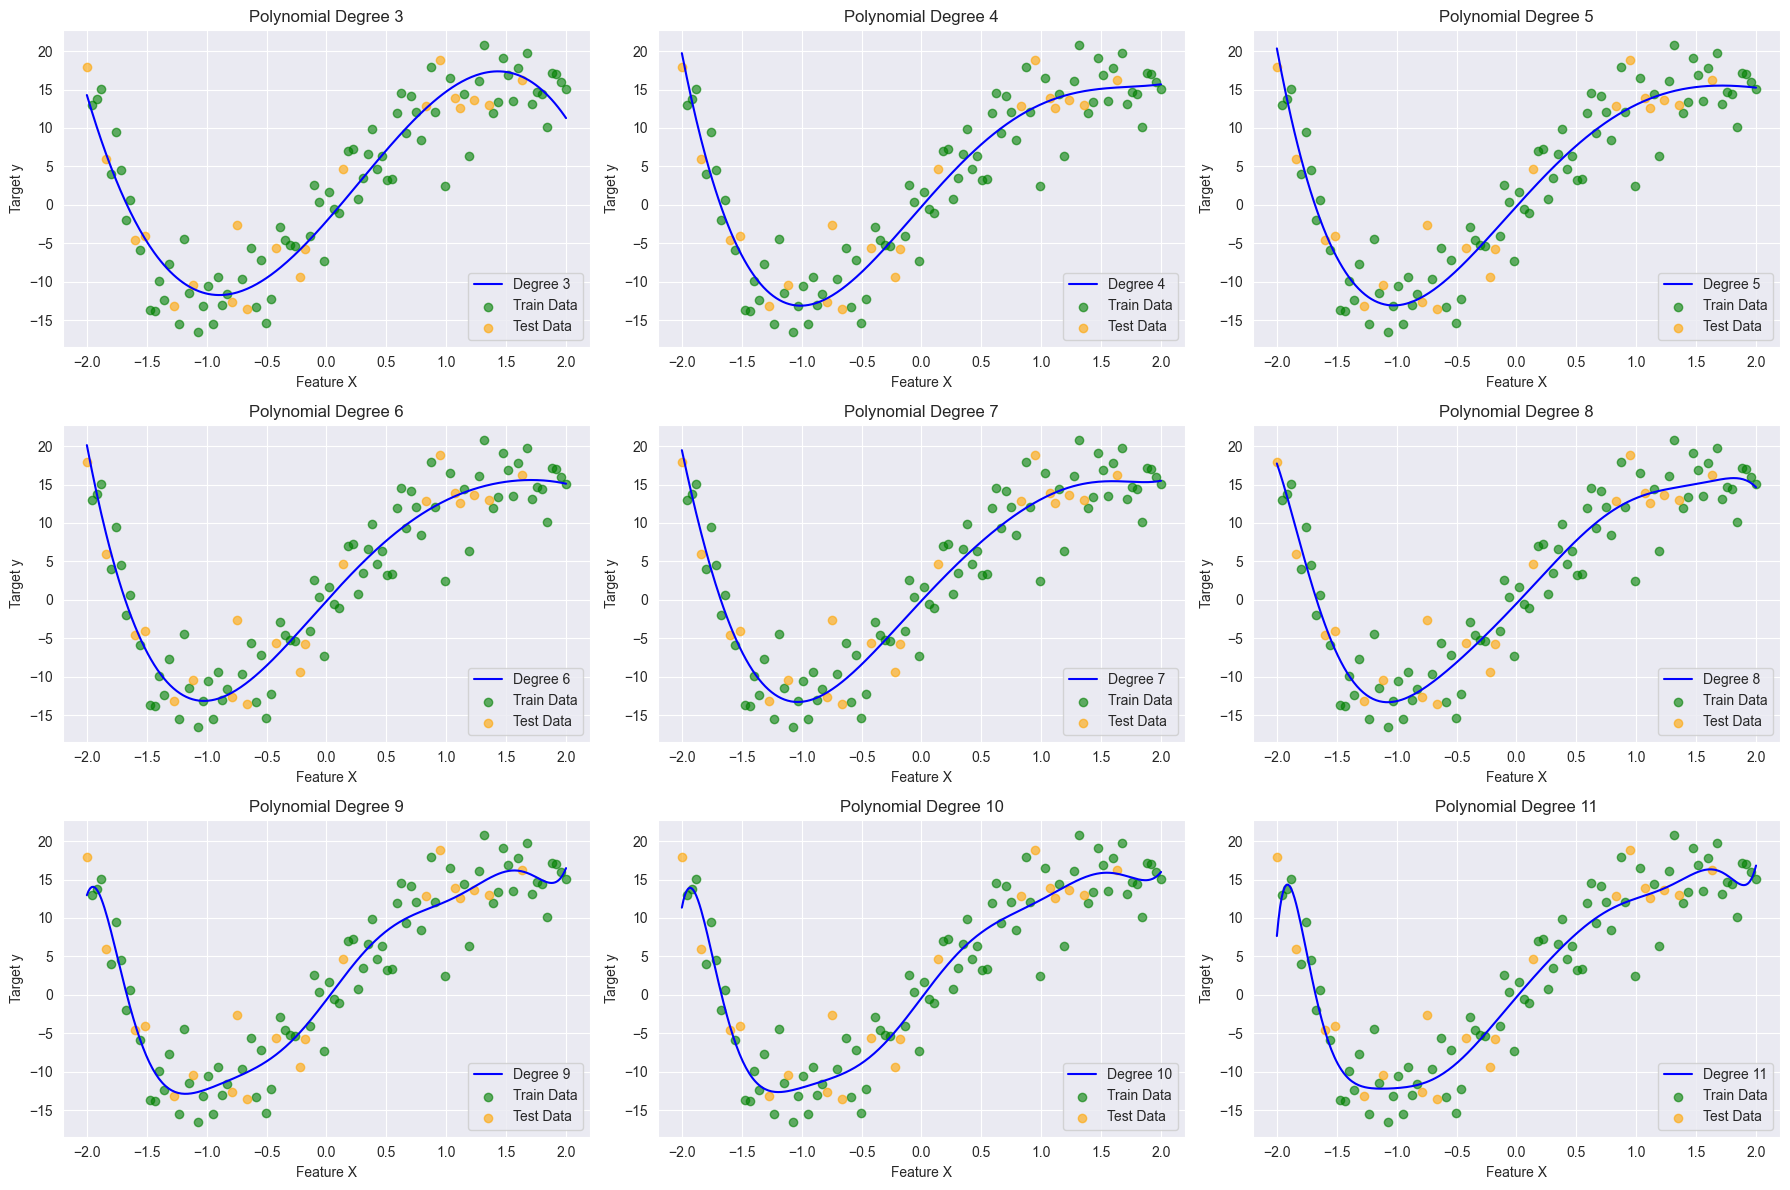

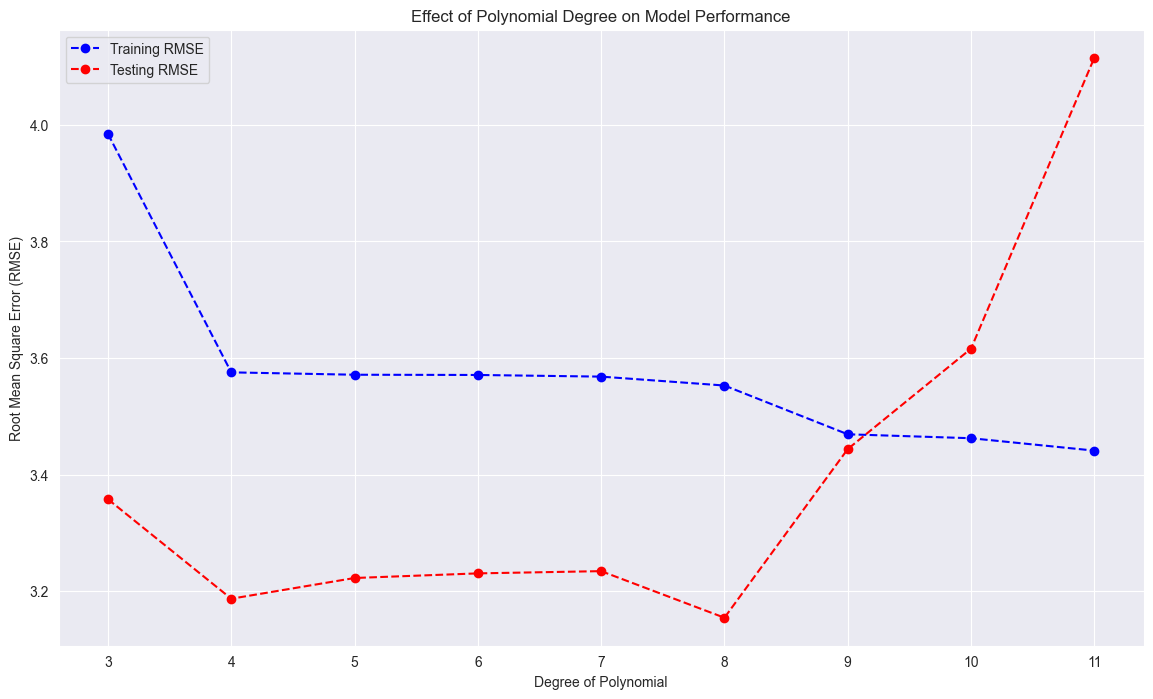

In [7]:
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
epsilon = np.random.normal(0, 1.0, size=X.shape[0])
y = (X.flatten()**4 - 4 * X.flatten()**3 + 16 * X.flatten() + 4 * epsilon)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(3, 12)
rmse_train = []
rmse_test = []

fig, axs = plt.subplots((len(degrees) + 2) // 3, 3, figsize=(18, 12))
axs = axs.flatten()

for idx, degree in enumerate(degrees):
    model = PolynomialRegressor(degree=degree)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train.append(train_rmse)
    rmse_test.append(test_rmse)

    X_fit = np.linspace(-2, 2, 300).reshape(-1, 1)
    y_fit = model.predict(X_fit)
    axs[idx].plot(X_fit, y_fit, label=f"Degree {degree}", color="blue")
    axs[idx].scatter(X_train.flatten(), y_train, color="green", label="Train Data", alpha=0.6)
    axs[idx].scatter(X_test.flatten(), y_test, color="orange", label="Test Data", alpha=0.6)
    axs[idx].set_title(f"Polynomial Degree {degree}")
    axs[idx].set_xlabel("Feature X")
    axs[idx].set_ylabel("Target y")
    axs[idx].legend()
    axs[idx].grid(True)

for ax in axs[len(degrees):]:
    ax.axis("off")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(degrees, rmse_train, label="Training RMSE", marker="o", linestyle="--", color="blue")
plt.plot(degrees, rmse_test, label="Testing RMSE", marker="o", linestyle="--", color="red")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.title("Effect of Polynomial Degree on Model Performance")
plt.legend()
plt.grid(True)
plt.show()


**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**  

**Ans:**  
Yes, the RMSE plot demonstrates the bias-variance tradeoff. At lower polynomial degrees, the model exhibits high bias, resulting in both high training and testing RMSE. As the degree increases, the model fits the data better, reducing both RMSE values. However, after a certain degree, overfitting occurs, characterized by low training RMSE but increasing test RMSE, highlighting the impact of high variance.

**Could you explain the reason behind the change in RMSE behavior after a certain polynomial degree?**  

**Ans:**  
As the polynomial degree increases, the model becomes more flexible and starts fitting the noise in the training data instead of capturing the true underlying relationship. This overfitting causes a sharp rise in test RMSE due to poor generalization, even though the training RMSE remains low. This behavior reflects the tradeoff between bias (underfitting) and variance (overfitting).

### Regularization (25 points)

Polynomial Regression can be enhanced with **regularization** to reduce the risk of overfitting, especially when working with high-degree polynomials. Two common regularization techniques are **Ridge Regression** and **Lasso Regression**, which modify the cost function to penalize large coefficients.

1. **Ridge Regression (L2 Regularization)**:
   Ridge regression penalizes the sum of the squared coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|^2
   $$
   - $ \lambda $: Regularization strength.
   - $ \| w \|^2 $: Sum of squared weights.

2. **Lasso Regression (L1 Regularization)**:
   Lasso regression penalizes the sum of the absolute coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|_1
   $$
   - $ \| w \|_1 $: Sum of absolute weights.


**Gradient Descent** is an iterative optimization algorithm used to minimize the cost function. For polynomial regression with regularization, the gradient updates are:

- For **Ridge**:
   $$
   w = w - \eta \left[ \frac{\partial J(w)}{\partial w} \right] = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} w \right]
   $$

- For **Lasso**:
   $$
   w = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} \cdot \text{sign}(w) \right]
   $$
   Where:
   - $ \eta $ is the learning rate.
   - $ \text{sign}(w) $ is the sign of the weights.


In [8]:
class PolynomialRegressorGD:
    def __init__(self, degree=2, reg_type='ridge', reg_lambda=0.01, learning_rate=0.01, epochs=20000):
        """
        Polynomial Regression using Gradient Descent with Regularization.
        """
        self.degree = degree
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        """
        Fit the polynomial regression model using gradient descent.
        """
        X_poly = self._polynomial_features(X)
        self.scaler = StandardScaler()
        X_poly = self.scaler.fit_transform(X_poly)
        self.w = np.random.randn(X_poly.shape[1]) * 0.01  # Initialize weights with small random values
        m = len(y)
        for _ in range(self.epochs):
            predictions = np.dot(X_poly, self.w)
            errors = predictions - y
            reg_term = self._compute_regularization()  # Separate regularization computation
            gradients = (2/m) * np.dot(X_poly.T, errors) + reg_term
            self.w -= self.learning_rate * gradients


    def predict(self, X):
        """
        Predict target values using the fitted model.
        """
        X_poly = self._polynomial_features(X)
        X_poly = self.scaler.transform(X_poly)
        return np.dot(X_poly, self.w)
    
    def _polynomial_features(self, X):
        return np.column_stack([X.flatten()**i for i in range(self.degree + 1)])

    def _compute_regularization(self):
        if self.reg_type == 'ridge':
            return (2 * self.reg_lambda / len(self.w)) * self.w
        elif self.reg_type == 'lasso':
            return (self.reg_lambda / len(self.w)) * np.sign(self.w)
        else:
            return 0  # No regularization


Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


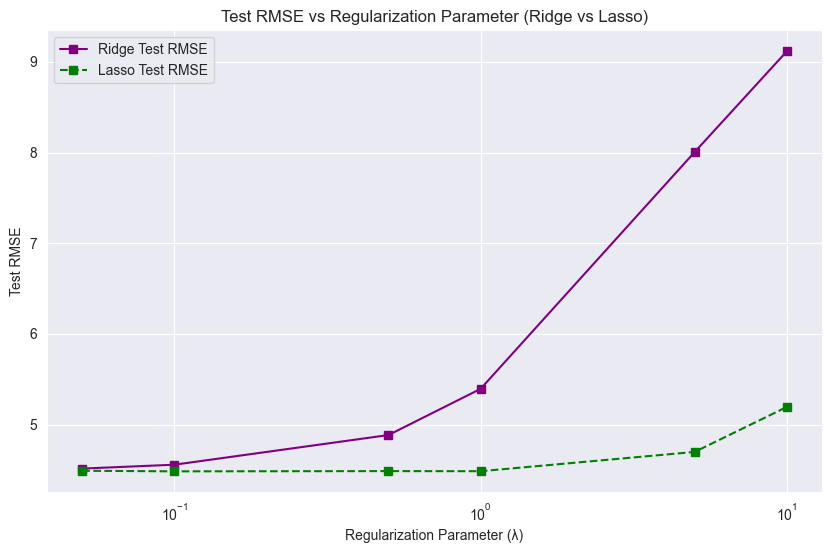

In [9]:

#TODO: train the model using required regularization and plot the RMSE

np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = (X**4 - 4*X**3 + 16*X + 4*np.random.normal(0, 1, size=X.shape)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lambdas = [0.05, 0.1, 0.5, 1, 5, 10]

ridge_test_rmse = []
lasso_test_rmse = []

for reg_lambda in lambdas:
    ridge_model = PolynomialRegressorGD(degree=7, reg_type='ridge', reg_lambda=reg_lambda, learning_rate=0.01, epochs=10000)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred_test = ridge_model.predict(X_test)
    ridge_test_rmse.append(np.sqrt(mean_squared_error(y_test, ridge_y_pred_test)))

    lasso_model = PolynomialRegressorGD(degree=7, reg_type='lasso', reg_lambda=reg_lambda, learning_rate=0.01, epochs=10000)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred_test = lasso_model.predict(X_test)
    lasso_test_rmse.append(np.sqrt(mean_squared_error(y_test, lasso_y_pred_test)))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_test_rmse, label="Ridge Test RMSE", marker="s", linestyle="-", color="purple")
plt.plot(lambdas, lasso_test_rmse, label="Lasso Test RMSE", marker="s", linestyle="--", color="green")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs Regularization Parameter (Ridge vs Lasso)")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()


**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:**

- **Ridge Regression:** By adding a penalty proportional to the sum of squared coefficients (L2 norm), ridge regression reduces the magnitude of coefficients to control overfitting. Initially, as \( \lambda \) increases, the model generalizes better, and RMSE decreases. However, at higher \( \lambda \), the model becomes too constrained, leading to underfitting and an increase in RMSE. 

- **Lasso Regression:** Lasso adds a penalty proportional to the sum of the absolute values of coefficients (L1 norm). It not only reduces coefficients but can shrink some to zero, effectively performing feature selection. With increasing \( \lambda \), lasso eliminates more features. While this can reduce RMSE by removing noise, excessively high \( \lambda \) leads to underfitting and a rise in RMSE.

Both methods aim to balance bias and variance. The optimal \( \lambda \) minimizes RMSE by appropriately penalizing the complexity of the model without losing essential information.

Generate a new sample dataset using the following formula:

$$
y = 2 \sin\left(\frac{\pi}{2} x\right) + \frac{1}{2} ϵ \quad , \quad x \in [-4, 4]
$$

where $ ϵ $ represents noise sampled from a $\mathcal{N}(0, 1) $ distribution. Plot the fitted polynomial with degrees ranging from 4 to 12 as well as the RMSE:


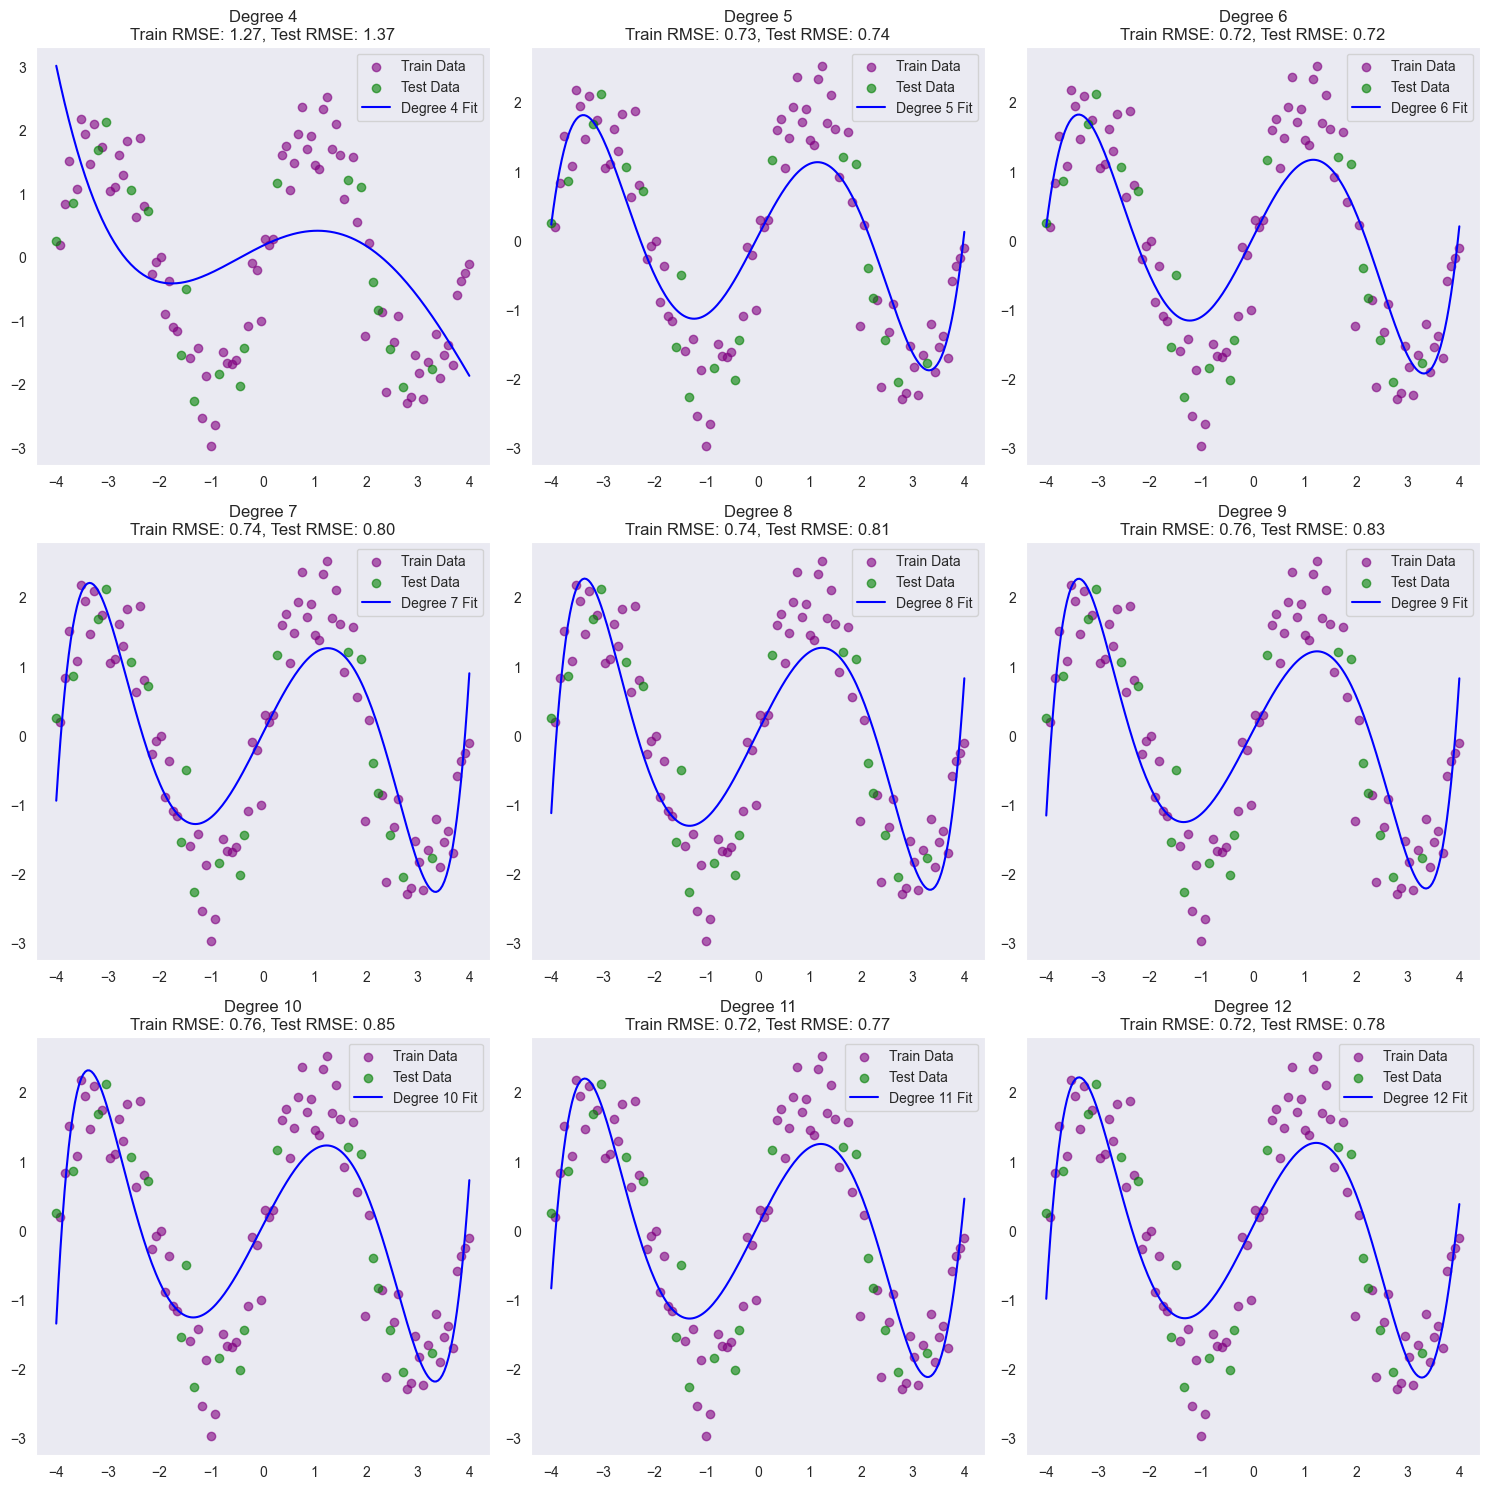

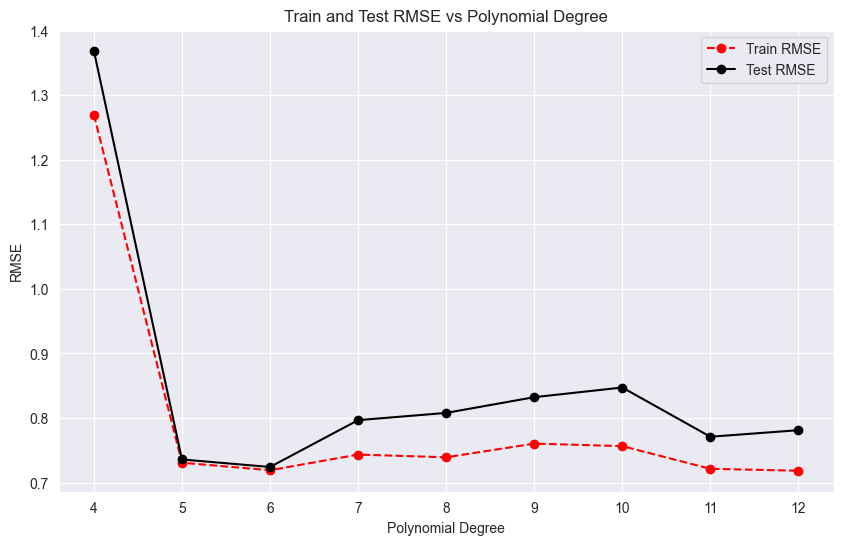

In [10]:

#TODO: train polynomial regression and visualize the RMSE
np.random.seed(42)
X = np.linspace(-4, 4, 100).reshape(-1, 1)
epsilon = np.random.normal(0, 1, size=(100, 1))
y = 2 * np.sin((np.pi / 2) * X).flatten() + (0.5 * epsilon).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(4, 13)

train_rmse_values = []
test_rmse_values = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
    poly_regressor = PolynomialRegressorGD(degree=degree)
    poly_regressor.fit(X_train, y_train)

    y_train_pred = poly_regressor.predict(X_train)
    y_test_pred = poly_regressor.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmse_values.append(train_rmse)
    test_rmse_values.append(test_rmse)

    axes[i].scatter(X_train, y_train, color="purple", alpha=0.6, label="Train Data")
    axes[i].scatter(X_test, y_test, color="green", alpha=0.6, label="Test Data")
    X_plot = np.linspace(-4, 4, 200).reshape(-1, 1)
    y_plot = poly_regressor.predict(X_plot)
    axes[i].plot(X_plot, y_plot, color="blue", label=f"Degree {degree} Fit")
    axes[i].set_title(f"Degree {degree}\nTrain RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse_values, marker="o", linestyle="--", label="Train RMSE", color="red")
plt.plot(degrees, test_rmse_values, marker="o", linestyle="-", label="Test RMSE", color="black")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Train and Test RMSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()


**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**

**Ans:**


**Could you explain what is the reason behind the change in behavior of RMSE after some degree? (Hint: you may look at the interval chosen)**

**Ans:**


Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


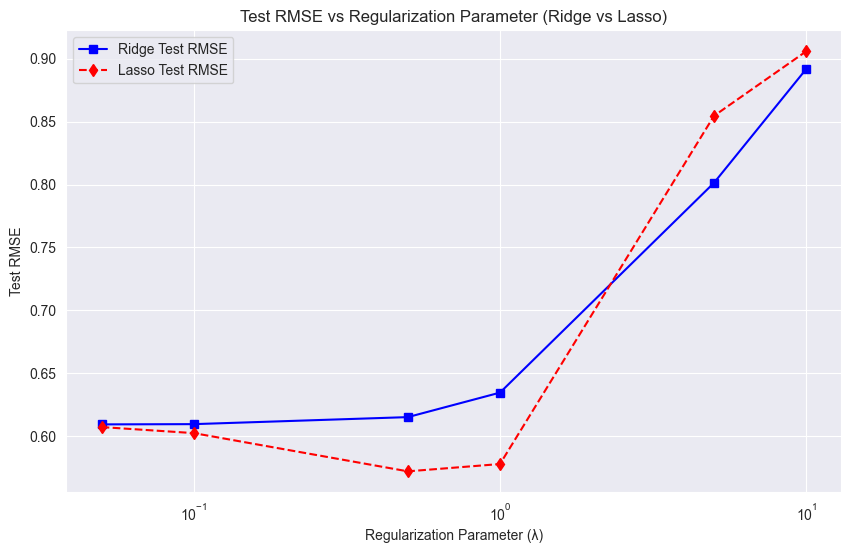

In [11]:

#TODO: train the model using required regularization and plot the RMSE
np.random.seed(42)
X = np.linspace(-4, 4, 100).reshape(-1, 1)
epsilon = np.random.normal(0, 1, size=(100, 1))
y = 1.5 * np.cos((np.pi / 3) * X).flatten() + (0.3 * epsilon).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lambdas = [0.05, 0.1, 0.5, 1, 5, 10]

ridge_test_rmse = []
lasso_test_rmse = []

for reg_lambda in lambdas:
    ridge_model = PolynomialRegressorGD(degree=11, reg_type='ridge', reg_lambda=reg_lambda, learning_rate=0.0005, epochs=15000)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred_test = ridge_model.predict(X_test)
    ridge_test_rmse.append(np.sqrt(mean_squared_error(y_test, ridge_y_pred_test)))

    lasso_model = PolynomialRegressorGD(degree=11, reg_type='lasso', reg_lambda=reg_lambda, learning_rate=0.0005, epochs=15000)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred_test = lasso_model.predict(X_test)
    lasso_test_rmse.append(np.sqrt(mean_squared_error(y_test, lasso_y_pred_test)))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_test_rmse, label="Ridge Test RMSE", marker="s", linestyle="-", color="blue")
plt.plot(lambdas, lasso_test_rmse, label="Lasso Test RMSE", marker="d", linestyle="--", color="red")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs Regularization Parameter (Ridge vs Lasso)")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()


**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:**
- **Ridge Regularization:** Ridge penalizes large coefficients using the L2 norm, which helps to reduce overfitting. As $\lambda $ increases, the model becomes less flexible, which initially reduces test RMSE by controlling variance. However, at very high $ \lambda $, the model underfits, leading to an increase in RMSE.
  
- **Lasso Regularization:** Lasso penalizes coefficients using the L1 norm, which not only reduces overfitting but also shrinks some coefficients to exactly zero. This acts as feature selection. For smaller $ \lambda $, lasso reduces overfitting and improves generalization. At very high $ \lambda $, the model underfits due to excessive simplification, causing test RMSE to rise.

In both cases, the RMSE behavior reflects the balance between underfitting and overfitting as $ \lambda $ changes.

---

**What is the main difference between this section and the last section?**

**Ans:**
The main difference lies in:
1. **Target Function:** This section uses a cosine-based target function (`1.5 * cos(pi/3 * X)`), while the last section used a sine-based function (`2 * sin(pi/2 * X)`).
2. **Noise Level:** This section introduces less noise (`0.3 * epsilon`) compared to the previous one (`0.5 * epsilon`).
3. **Colors and Markers in Plots:** Ridge RMSE is shown in blue with square markers and solid lines, while Lasso RMSE is shown in red with diamond markers and dashed lines. This is different from the last section's plot styling.

## Poissson Regression (40 points)

Poisson regression is a type of Generalized Linear Model (GLM) used for modeling count data and event occurrence rates. It assumes that the response variable $y$ follows a Poisson distribution and models the logarithm of the expected value of $y$ as a linear function of the predictors.

### Characteristics
- **Response Variable**: Count data (non-negative integers).
- **Link Function**: Logarithm function.
- **Assumption**: The mean and variance of the response variable are equal (although this can be relaxed in quasi-Poisson models).

### Model Definition
The Poisson regression model can be written as:
$y_i \sim \text{Poisson}(\mu_i)$

where $y_i$ is the observed count for the $i_{th}$ observation, and $\mu_i$ is the expected value of $y_i$.

The relationship between the predictors and $\mu_i$ is expressed as:
$\log(\mu_i) = \mathbf{x}_i^\top \boldsymbol{\beta}$

where:
- $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^\top$: The vector of predictors for the $i_th$ observation.
- $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_p]^\top$: The vector of coefficients.

Alternatively, in terms of $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$

### Log-Likelihood Function
The log-likelihood function for Poisson regression is:

$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log(\mu_i) - \mu_i - \log(y_i!) \right]$$
where $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$.

### Gradient (Score Function)
The gradient of the log-likelihood with respect to $\beta$ is:
$\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \sum_{i=1}^n \mathbf{x}_i (y_i - \mu_i)$

### Now, write your Poisson Regression class (10 points)

In [105]:
class PoissonRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None  # Initialize coefficients

    def _log_likelihood(self, X, y):
        """
        Calculate the log-likelihood for Poisson regression.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).

        Returns:
        - float: The log-likelihood of the model given the data.
        """
        μ = np.exp(X @ self.beta)
        return np.sum(y * np.log(μ) - μ)

    

    def _gradient(self, X, y, μ):
        """
        Perform gradient descent to update the coefficients.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).

        Returns:
        - None: The model coefficients will be updated in place.
        """
        return X.T @ (y - μ)
    
    def _hessian(self, X, μ):
        S = np.diagflat(μ)
        return X.T @ S @ X
    
    
    def _update_weights(self, X, y):
        for _ in range(self.epochs):
            μ = np.exp(X @ self.beta)
            gradient = self._gradient(X, y, μ)
            hessian = self._hessian(X, μ)
            self.beta += self.learning_rate * np.linalg.inv(hessian) @ gradient
    

    def fit(self, X, y):
        """
        Fit the Poisson regression model using gradient descent.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).

        Returns:
        - None: The coefficients will be updated in place.
        """
        X_bias = np.c_[np.ones(X.shape[0]), X]
        self.beta = np.zeros(X_bias.shape[1])
        self._update_weights(X_bias, y)
        

    def predict(self, x):
        x_bias = np.c_[np.ones(x.shape[0]), x]
        return np.exp(x_bias @ self.beta)
    
    

### Generate Dataset (10 points)
Generate poisson data using numpy.

In [106]:
# poisson data
np.random.seed(42)
b0 = 1
b1 = 0.15
X = np.random.uniform(0, 20, 100)
λ = np.exp(b0 + b1 * X)
y = np.random.poisson(λ)



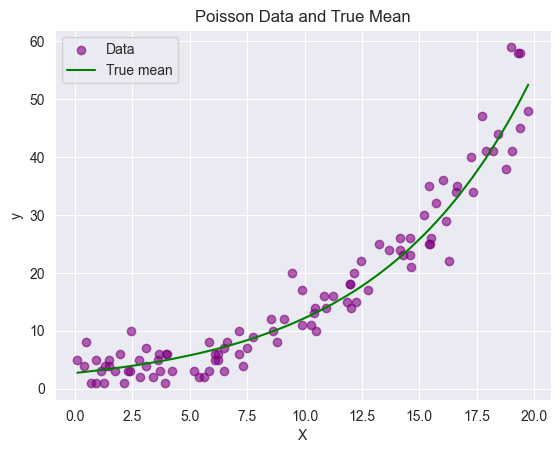

In [107]:
# plot the poisson mean value and the data


plt.scatter(X, y, alpha=0.6, label='Data', color='purple')
plt.plot(np.sort(X), λ[np.argsort(X)], color='green', label='True mean')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Poisson Data and True Mean')
plt.grid(True)
plt.show()


### Fit poisson regression on data and plot the predicted poisson regression (10 points)

In [108]:
# fit your poisson regression model
model = PoissonRegression(learning_rate=1.0, epochs=100)
model.fit(X.reshape(-1, 1), y)

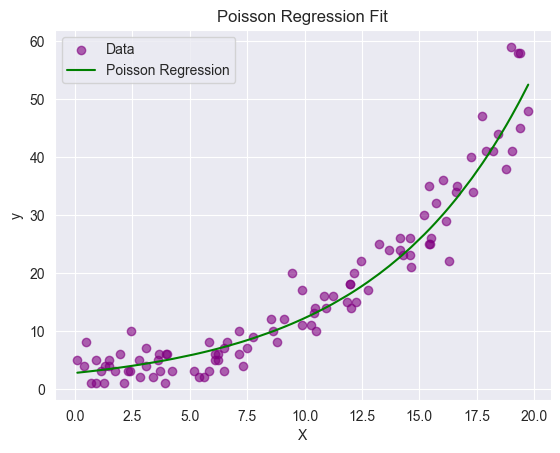

In [109]:
# plot the prediction
X_plot = np.linspace(0, 20, 100)
y_pred = model.predict(X_plot.reshape(-1, 1))

plt.scatter(X, y, alpha=0.6, label='Data', color='purple')
plt.plot(np.sort(X), λ[np.argsort(X)], color='green', label='Poisson Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Poisson Regression Fit')
plt.grid(True)
plt.show()

### Use different learning rate and plot your prediction (10 points)

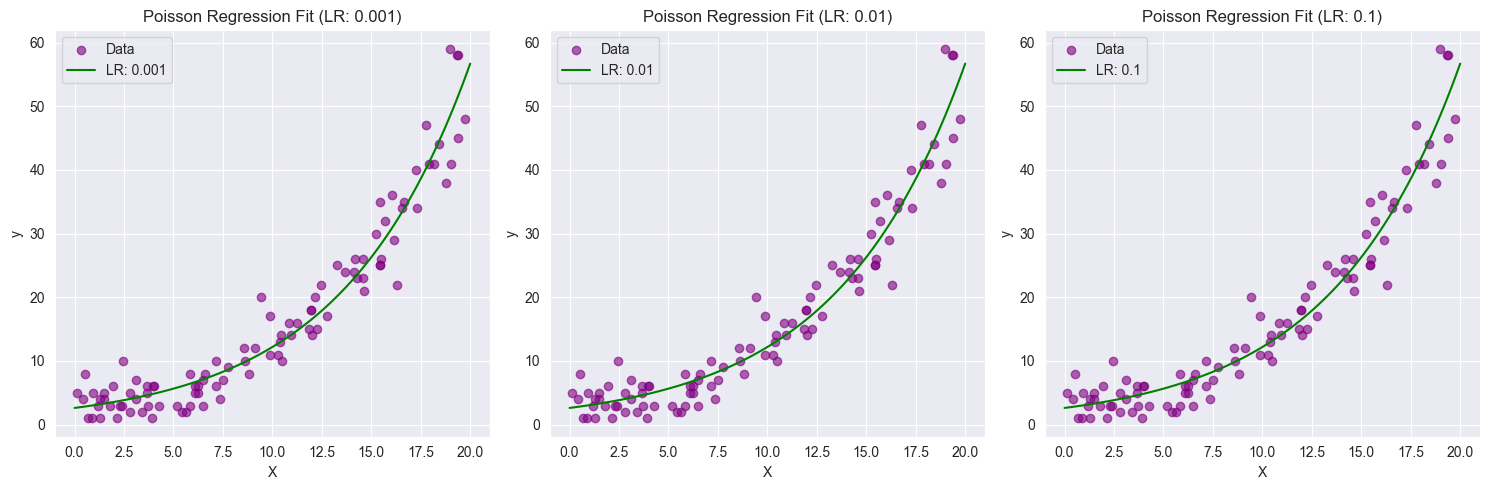

In [112]:
learning_rates = [0.001, 0.01, 0.1]
X_plot = np.linspace(0, 20, 100)
plt.figure(figsize=(15, 5))
for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i + 1)
    model = PoissonRegression(learning_rate=lr, epochs=10000)
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_plot.reshape(-1, 1))
    plt.scatter(X, y, alpha=0.6, label='Data',color='purple')
    plt.plot(X_plot, y_pred, color='green', label=f'LR: {lr}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Poisson Regression Fit (LR: {lr})')

plt.tight_layout()
plt.show()